## 1. 回归方程残差问题
### 最小二乘法估计回归方程参数结果时，潜在对残差做正态性假设
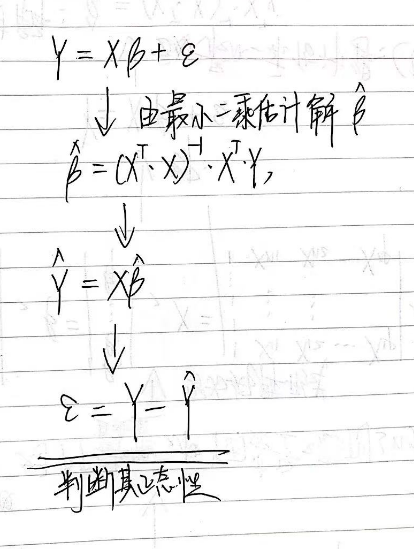
使用shapiro.test()函数可以帮助判断残差正态性

In [5]:
#举例：有下面这样一组数据，求自变量与因变量关系
A<-data.frame(
    X=c(10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0),
    Y1=c(8.04,6.95, 7.58,8.81,8.33,9.96,7.24,4.26,10.84,4.82,5.68),
    Y2=c(9.14,8.14, 8.74,8.77,9.26,8.10,6.13,3.10, 9.13,7.26,4.74),
    Y3=c(7.46,6.77,12.74,7.11,7.81,8.84,6.08,5.39, 8.15,6.44,5.73),
    X4=c(rep(8,7), 19, rep(8,3)),
    Y4=c(6.58,5.76,7.71,8.84,8.47,7.04,5.25,12.50, 5.56,7.91,6.89)
)
A

X,Y1,Y2,Y3,X4,Y4
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10,8.04,9.14,7.46,8,6.58
8,6.95,8.14,6.77,8,5.76
13,7.58,8.74,12.74,8,7.71
9,8.81,8.77,7.11,8,8.84
11,8.33,9.26,7.81,8,8.47
14,9.96,8.10,8.84,8,7.04
6,7.24,6.13,6.08,8,5.25
4,4.26,3.10,5.39,19,12.50
12,10.84,9.13,8.15,8,5.56


In [6]:
lm.fit <- lm(Y3~X, data=A)

In [7]:
#取residual
residual <- residuals(lm.fit)
residual

1           2           3           4           5           6 
-0.54118182 -0.23245455  3.24072727 -0.39181818 -0.69054545 -1.15863636 
          7           8           9          10          11 
 0.07627273  0.38500000 -0.84990909 -0.06309091  0.22563636

In [8]:
shapiro.test(residual)


	Shapiro-Wilk normality test

data:  residual
W = 0.74064, p-value = 0.00157


可见残差非正态！

## 2. 影响分析

所谓影响分析即探查影响异常大的数据，例如下图
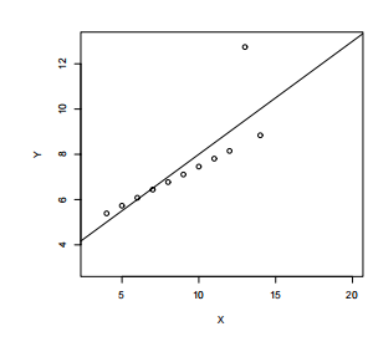

使用 DFFITS准则可以帮助筛除异常影响的数据点

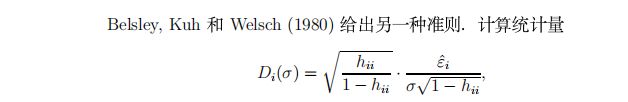

In [9]:
#在R中使用diffits() 函数做判断

lm.fit <- lm(Y3~X, data=A)

In [10]:
d <- dffits(lm.fit)
d
which.max(d)

1            2            3            4            5            6 
 -0.14677147  -0.06242906 342.78507734  -0.09972521  -0.21969771  -0.78978218 
           7            8            9           10           11 
  0.02923165   0.24486736  -0.33650280  -0.01967294   0.10982703

3 
3

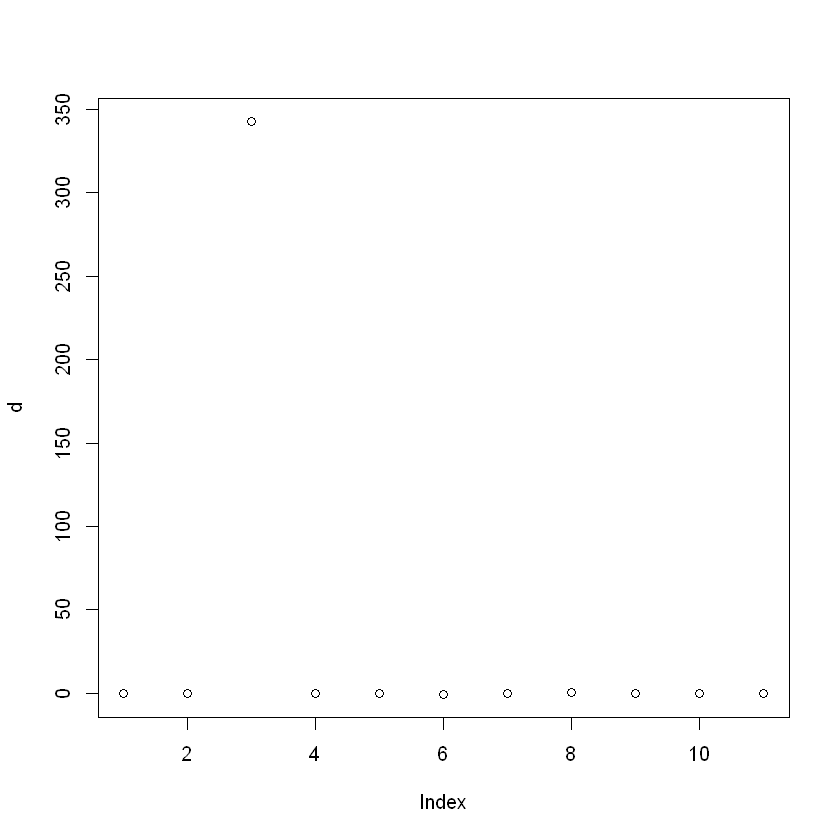

In [11]:
plot(d)

## 3.多重共线性

当自变量彼此相关性强，就回引起多重共线性。

使用kappa()可以帮助检验是否存在多重共线性问题,起统计值k>1000时，一般认为共线性强

In [12]:
#生成一新数据集
collinear<-data.frame(
    Y=c(10.006, 9.737, 15.087, 8.422, 8.625, 16.289,
    5.958, 9.313, 12.960, 5.541, 8.756, 10.937),
    X1=rep(c(8, 0, 2, 0), c(3, 3, 3, 3)),
    X2=rep(c(1, 0, 7, 0), c(3, 3, 3, 3)),
    X3=rep(c(1, 9, 0), c(3, 3, 6)),
    X4=rep(c(1, 0, 1, 10), c(1, 2, 6, 3)),
    X5=c(0.541, 0.130, 2.116, -2.397, -0.046, 0.365,
    1.996, 0.228, 1.38, -0.798, 0.257, 0.440),
    X6=c(-0.099, 0.070, 0.115, 0.252, 0.017, 1.504,
    -0.865, -0.055, 0.502, -0.399, 0.101, 0.432)
)

In [13]:
collinear

Y,X1,X2,X3,X4,X5,X6
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10.006,8,1,1,1,0.541,-0.099
9.737,8,1,1,0,0.130,0.070
15.087,8,1,1,0,2.116,0.115
8.422,0,0,9,1,-2.397,0.252
8.625,0,0,9,1,-0.046,0.017
16.289,0,0,9,1,0.365,1.504
5.958,2,7,0,1,1.996,-0.865
9.313,2,7,0,1,0.228,-0.055
12.960,2,7,0,1,1.380,0.502


In [14]:
XX <- cor(collinear[2:7])
XX

,X1,X2,X3,X4,X5,X6
X1,1.00000000,0.05230658,-0.3433818,-0.49761095,0.4172974,-0.19209942
X2,0.05230658,1.00000000,-0.4315953,-0.37069641,0.4845495,-0.31673965
X3,-0.34338179,-0.43159531,1.0000000,-0.35512135,-0.5051579,0.49437941
X4,-0.49761095,-0.37069641,-0.3551214,1.00000000,-0.2145543,-0.08690551
X5,0.41729739,0.48454950,-0.5051579,-0.21455429,1.0000000,-0.12295400
X6,-0.19209942,-0.31673965,0.4943794,-0.08690551,-0.1229540,1.00000000


In [15]:
kappa(XX)

[1] 3151.046